In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_csv("urdu-sentiment-corpus-v1.tsv", sep='\t')
data.sample(5)

,Tweet,Class
659,اللہ جانے وے ماہی تیرا پیار کی اے دل دی اوداسی نی جاندی,N
264,میں حُر ہوں ابھی لشکرِ یزید میں ھوں میرا حسینؑ ابھی کربلا نہیں پہنچا,P
399,پنجاب: مزید 23 افراد ڈینگی وائرس کا شکار,N
730,کے اہتمام علماء کا انوکا اجتماع جس میں سنی، شیعہ،بریلوی، دیوبند اور اہلحدیث تمام مکاتب فکرکے علماء 1 چھت کے نیچے جمع،1 جگہ باجماعت نمازکی ادائیگی,P
986,مہاجر اپنے حصے کا پاکستان ساتھ لیکر آئے تھے ، خواجہ اظہار الحسن۔۔۔ العجب,P


In [3]:
data['Class'].value_counts()

Class
N    499
P    480
O     20
Name: count, dtype: int64

# Investigating instances of all classes

In [4]:
data[data['Class']=="O"].sample(5)

,Tweet,Class
453,ایک گھنٹے بعد کیا کرو گی؟,O
886,وجہ کیا تھی؟,O
477,ایک آدمی نے اپنے بیٹے کو سمجھانے کے لیے اسے ایک شیشے کے سامنے کھڑا کر کے پوچھا بیٹا اس شیشے میں تمہیں کیا نظر آ۔۔۔,O
614,انصافیوں کے ٹرینڈ کا احوال: 1۔ اوریجنل ٹرینڈ = 20۔5 %2۔ ریٹویٹس = 75۔7 %3۔ ریپلائیز = 3۔8 %,O
587,اگر ٹرین کی رفتار 120 کلومیٹر فی گھنٹہ ہو، تو 2 منٹ کی وڈیو میں ٹرین کی تقریباً لمبائی کیا ہوسکتی ہے ؟؟؟,O


In [5]:
data[data['Class']=="P"].sample(5)

,Tweet,Class
230,کچھ لوگوں کو شکریہ کہنا ہے جو۔۔۔پٹوریوں کو ان کی زبان میں جواب دیتے ہے اورکا دفاع کرتے ہے وغیرہ کو,P
177,: ایم کیو ایم کو منانے کی کوئی کوشش نہیں کی،رحمان ملک گویا اس بار خود ہی ذلیل ہو کہ واپس آ جاویں گے جیسے طاھر کینیڈوی ذلیل و رسوا ہو کہ آ گئے,P
407,اسلام علیکم الله آپ کو خوش اور سلامت رکھے ۔آمین۔ صبح جمعہ مبارک!,P
974,"بہت بہت شکریہ۔ خیر مُبارک, آپکو بھی مُبارک ہو",P
44,اتنا کام پڑا ہے اور میں کھیل رہی ہوں اردو کی بورڈ سے,P


In [6]:
data[data['Class']=="N"].sample(5)

,Tweet,Class
184,اپنے باپ شوبازشریف کو بول پہلے وہ پنجاب کو بچالے اور تو اپنی بجلی پر توجہ دے ۔ ماما نا بن خیبر پختونخواہ کا۔جعلی معزز بهڑوے سالے,N
650,میں نے پوچھا کہ زندگی کیا ہے ہنس دئیے پھول، رو پڑی شبنم,N
954,مگر ہم بیان ہوں کیسے رسوائیوں سے ڈرتا ہوں شاید,N
659,اللہ جانے وے ماہی تیرا پیار کی اے دل دی اوداسی نی جاندی,N
909,طاہر القادری کے نام کیسی انوکھی داستان سب کو سنا گیاایک شخص سارے ملک کو ماموں بن بنا گیا,N


We have instances belonging to three different sentiment classes:
1. "P" - Positive Sentiment
2. "N" - Negative Sentiment
3. "O" - Other/Neutral Sentiment

# Preprocessing

### Dropping instances with nan labels

In [7]:
data['Class'].unique()

array(['P', 'N', 'O', nan], dtype=object)

In [8]:
data.dropna(subset=['Class'], inplace=True)  #drop rows with NaN values in 'Class' column
data.reset_index(drop=True, inplace=True)  #reset index

In [9]:
data['Class'].unique()

array(['P', 'N', 'O'], dtype=object)

### Encoding target column labels

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Class'] = label_encoder.fit_transform(data['Class'])

### Tokenzation

In [11]:
import re

def tokenize(row):
    words = re.findall(r"\w+.", row)
    return words

data['Tweet']= data['Tweet'].apply(tokenize)
data.sample(5)

,Tweet,Class
214,"[سبزے , کو , جب , کہیں , جگہ , نہ , ملی , بن , گیا , روئے , آب , پر , کائی , غالب]",2
770,"[حکومت , سیاسی , قائدین , کوتحفظ , دینے , میں , ناکام , ہوچکی , ہے , شیریں , مزاری]",0
219,"[ﺁﺧﺮﯼ , ﻓﺘﺢ , ﺧﺎﻣﻮﺷﯽ , ﮐﯽ , ﮨﻮﺋﯽ , ﺍﻭﺭ , ﺁﻭﺍﺯ , ﻓﻨﺎ , ﮨﻮ , ﮔﺌﯽ ]",2
587,"[نیوز , چینلز , کے , پرائم , ٹائم , پر , لایا , گیا , انقلاب , اٹھ , گیاخطرہ , ہے , انقلاب , کے , روح , رواں , قبض , شکار , نہ , ہوں , لہذا , وقت , پر , اسبغول , پی , لیا , کریں ]",0
558,"[جمعه , مبارک , دعا , میں , یاد , رکھیں , شکریه]",2


In [12]:
def remove_whitespace(tokens):
    return [token.strip() for token in tokens]

#apply whitespace removal function to each tweet
data['Tweet'] = data['Tweet'].apply(remove_whitespace)
#data['Tweet'][1]

### Checking average tokens per tweet count before preprocessing

In [13]:
token_count =  data['Tweet'].apply(len)

#compute the average number of tokens per tweet
average_tokens_per_tweet = token_count.mean()

print("Average tokens per tweet:", average_tokens_per_tweet)

Average tokens per tweet: 17.26926926926927


### Filter out tokens containing math integers, English words, punctuations and stopwords

In [14]:
#filter integers
def filter_integers(tokens):
    return [token for token in tokens if not re.search(r'\d', token)]

data['Tweet'] = data['Tweet'].apply(lambda tokens: filter_integers(tokens))
#data.iloc[581:582]

In [15]:
#filter english words
def filter_english(tokens):
    return [token for token in tokens if not re.search(r'[A-Z a-z]+.', token)]

data['Tweet'] = data['Tweet'].apply(lambda tokens: filter_english(tokens))
#data.iloc[581:582]

In [16]:
unwanted_chars = ['،', '؛', '؟', '۔', '٪', '،', '=', '(', ')']

#function to remove punctuations and other noisy character tokens
def filter_punctuation(tokens):
    return [token for token in tokens if token not in unwanted_chars]

data['Tweet'] = data['Tweet'].apply(lambda tokens: filter_punctuation(tokens))
#data.iloc[600:602]

In [17]:
urdu_stopwords = ['کہ', 'کے', 'کی', 'کو', 'سے', 'ہو', 'گا', 'گی', 'ہیں', 'یہ', 'اور', 'یا', 'تھا', 'تھی', 'ہے', 'کر', 'کرکے', 'وغیرہ','میں','سے']

#function to remove Urdu stopwords
def remove_stopwords(tokens):
    return [token for token in tokens if token not in urdu_stopwords]

data['Tweet'] = data['Tweet'].apply(lambda tokens: remove_stopwords(tokens))
#data.iloc[696:697]

### Checking average tokens per tweet count after preprocessing

In [18]:
token_count =  data['Tweet'].apply(len)

#compute the average number of tokens per tweet
average_tokens_per_tweet = token_count.mean()

print("Average tokens per tweet:", average_tokens_per_tweet)

Average tokens per tweet: 14.36936936936937


In [19]:
#saving a copy of the preprocessed dataframe
preprocessed_data = data.copy()

# Feature Extraction

### Term Frequency - Inverse Document Frequency (TF-IDF)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

#convert tokenized tweets back to strings
data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join(x))

#initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(data['Tweet'])

#convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df['Label'] = data['Class']
tfidf_df

,ءاللہ,آؤٹ,آؤے,آئ,آئن,آئندہ,آئوٹ,آئی,آئینہ,آئینی,...,ﻭﺟﮧ,ﻭﺣﺸﺖ,ﻭﺯﺍﺭﺕ,ﻭﻗﺖ,ﻭﻗﻔﮯ,ﻮﭦ,ﻮﮔﻮﮞ,ﻻﮨﻮﺭ,ﻻﺯﻡ,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [21]:
tfidf_df.shape

(999, 4969)

# Training Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = tfidf_df.iloc[:, :-1]  # Selecting all columns except the last one
y = tfidf_df.iloc[:, -1]   # Selecting the last column as the target variable

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
#use the trained model for making predictions on test set
y_pred = model.predict(X_test)

#check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.665


# Evaluation

Confusion Matrix:


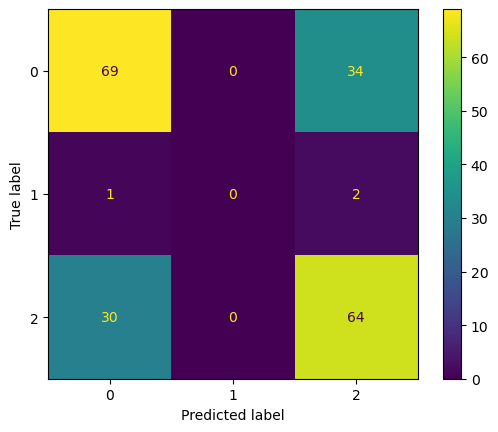

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [25]:
#classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       103
           1       0.00      0.00      0.00         3
           2       0.64      0.68      0.66        94

    accuracy                           0.67       200
   macro avg       0.44      0.45      0.45       200
weighted avg       0.66      0.67      0.66       200



# Trying different methods for improving scores

## Dropping the minority class

In [26]:
data = preprocessed_data.copy()

In [27]:
#removing minority class instances

data = data[data['Class']!=1]
data.reset_index(drop=True, inplace=True) 

## Using different method for numerical representations of text

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

#convert the list of tokens into space-separated strings for CountVectorizer
corpus = [' '.join(tokens) for tokens in data['Tweet']]

vectorizer = CountVectorizer()
vectorizer.fit(corpus)

bow_matrix = vectorizer.transform(corpus)

#convert the BoW matrix to dataframe
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

#join the target column with bow_df
bow_df['Label'] = data['Class']

bow_df

,ءاللہ,آؤٹ,آؤے,آئ,آئن,آئندہ,آئوٹ,آئی,آئینہ,آئینی,...,ﻭﺟﮧ,ﻭﺣﺸﺖ,ﻭﺯﺍﺭﺕ,ﻭﻗﺖ,ﻭﻗﻔﮯ,ﻮﭦ,ﻮﮔﻮﮞ,ﻻﮨﻮﺭ,ﻻﺯﻡ,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## Retrain the model again and see if there's any improvement

In [29]:
X = bow_df.iloc[:, :-1]  #selecting all columns except the last one
y = bow_df.iloc[:, -1]   #selecting the last column as the target variable

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
#use the trained model for making predictions on test set
y_pred = model.predict(X_test)

#check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5969387755102041


Confusion Matrix:


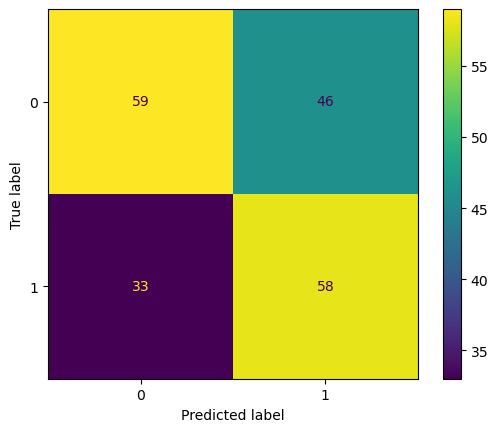

In [31]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()